<a href="https://colab.research.google.com/github/anamilanezi/google-data-analytics/blob/main/Google_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1A6Ozzcfx-EqYeK5uwMx7-cTyyUMXIy0P)

<p align="right">
Photo by <a href="https://unsplash.com/@autumnstudio?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Autumn Studio</a> on <a href="https://unsplash.com/s/photos/bike-share?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></p>
  

# **`CYCLISTIC BIKE SHARE`**




# 1️⃣ 🚲 A clear statement of the business task

<p align="justify">
The Cyclistic bike-share analysis case study is part of the Google Data Analytics Professional Certificate. On this project, we perform an analysis for a fictional company called Cyclistic aiming to identify key aspects of its costumers. Based on finantial analysis, the company and its marketing team have the goal of maximizing the number of annual members, and the main target is casual riders that already know about the company.</p>

<p align="justify">Based on the historical trip data, the company wants to identify trends and other useful information about its users.</p>

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual membership?
3. How can Cyclistic use digital media to influence casual riders to become members?

The objective is to produce a report with the following deliverables:
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis

## Analysis goals:

* Mean of ride_length
* Max ride_length
* Min ride_lenght
* Mode of day of week
* Replace weekday names for numbers
* Average ride_length for members and casual riders
* Average ride_length by day of week
* Number of rides for users by day_of_week

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2️⃣ Data Sources and Tools: Importing modules and CSV files

To prepare, process and analysis the data, I'm going to use the following libraries and packages:
* [Glob](https://docs.python.org/3/library/glob.html): finds all the pathnames matching a specified pattern according to the rules used by the Unix shell;
* [Pandas](https://pandas.pydata.org/): data cleaning, manipulation, operations and analysis
* [Seaborn](https://seaborn.pydata.org/) and [Matplotlib](https://matplotlib.org/): data visuals

In [2]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import timedelta


In [3]:
# Get CSV files list from a folder
path = '/content/drive/MyDrive/Colab Notebooks/Google Capstone Project/data/raw_data'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
big_df = pd.concat(df_list, ignore_index=True)

# 3️⃣ Data preparation and cleaning

## Cheking for NaN Values

`.count()` gives the number of non-NA cells for each column or row.

In [4]:
big_df.count()

ride_id               5900385
rideable_type         5900385
started_at            5900385
ended_at              5900385
start_station_name    5064367
start_station_id      5064370
end_station_name      5008282
end_station_id        5008282
start_lat             5900385
start_lng             5900385
end_lat               5895011
end_lng               5895011
member_casual         5900385
dtype: int64

In [5]:
columns = list(big_df.columns)

for column in columns:
  total_nan = big_df[column].isna().sum()
  print(f"[{column}] has {total_nan} NaN values")


[ride_id] has 0 NaN values
[rideable_type] has 0 NaN values
[started_at] has 0 NaN values
[ended_at] has 0 NaN values
[start_station_name] has 836018 NaN values
[start_station_id] has 836015 NaN values
[end_station_name] has 892103 NaN values
[end_station_id] has 892103 NaN values
[start_lat] has 0 NaN values
[start_lng] has 0 NaN values
[end_lat] has 5374 NaN values
[end_lng] has 5374 NaN values
[member_casual] has 0 NaN values


Since the total of NaN values for the coluns `'start_station_name'`, `'start_station_id'`, `'end_station_name'` and `end_station_id'` represents 14.17% of rows, I'll maintain these records for the analysis. For the most part there is latitude and longitude values for both start and end points, those should give us enough information, and the records with NaN values for latitude and longitude (0.09% of total records) will be deleted.

In [6]:
df = big_df[['ride_id', 'rideable_type', 'started_at', 'ended_at', 'member_casual']]

In [7]:
df = df.dropna()

In [8]:
df.count()

ride_id          5900385
rideable_type    5900385
started_at       5900385
ended_at         5900385
member_casual    5900385
dtype: int64

In [9]:
columns = list(df.columns)

for column in columns:
  total_nan = df[column].isna().sum()
  print(f"[{column}] has {total_nan} NaN values")

[ride_id] has 0 NaN values
[rideable_type] has 0 NaN values
[started_at] has 0 NaN values
[ended_at] has 0 NaN values
[member_casual] has 0 NaN values


## Finding duplicates:

In [10]:
df.duplicated().any()

False

## Convert date column from string to datetime

In [11]:
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')

In [12]:
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [13]:
print(df.dtypes)

ride_id                  object
rideable_type            object
started_at       datetime64[ns]
ended_at         datetime64[ns]
member_casual            object
dtype: object


## Creating new columns from date information

### Get day of week each ride started and turning into numerical column

In [14]:
# Get the day of week that each ride started
df['day_of_week'] = df['started_at'].dt.day_name()

In [15]:
# Turning day of week into a numerical column
import calendar
days = {name: i + 1 for i, name in enumerate(calendar.day_name)}
print(days)

{'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}


In [16]:
df['int_day_of_week'] = df['day_of_week'].apply(lambda x: days[x] if x == x else x)

In [17]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [18]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,int_day_of_week
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,casual,Friday,5
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,casual,Wednesday,3
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,member,Sunday,7
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,member,Thursday,4
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,casual,Wednesday,3


### Create a column for month

In [19]:
df['int_month'] = df['started_at'].apply(lambda x: x.month)

In [20]:
df['month'] = df['started_at'].dt.month_name()

In [21]:
months_order = [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]

In [22]:
# Create a dictionary for months:

month_names = {(i): name for i, name in enumerate(calendar.month_name) if i != 0}
print(month_names)

{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


In [23]:
df = df.sort_values(by=['started_at'])

### Create a column for the hour of day each ride started

In [24]:
df['hour'] = df['started_at'].apply(lambda x: x.hour)

### Calculate the ride length and turning into minutes

In [25]:
# Calculate the ride length 
df['ride_length'] = df['ended_at'] - df['started_at']

In [26]:
# Transform in minutes
df['ride_length_minutes'] = (df['ride_length']/timedelta(minutes=1)).round(decimals = 2)

## Updating costumer column values using `.title()`

In [27]:
df['member_casual'] = df['member_casual'].apply(lambda x: x.title())

## Getting a statistical overview using `.describe()`, treating inconsistent values and outliers

Without giving the data any treatment we have:
* The minimum ride length for all users was equal to -1 days +21:42:35	
* The maximum ride length for all users was equal to 34 days 02:27:09
* The median ride length for all users was equal to 00:11:10
* The most frequent day of rides was Saturday
* The month with more rides was July 2021


In [28]:
df[['ride_length', 'ride_length_minutes', ]].describe()

,ride_length,ride_length_minutes
count,5900385,5.900385e+06
mean,0 days 00:20:16.942832713,2.028238e+01
std,0 days 02:35:13.345907040,1.552224e+02
min,-1 days +21:42:35,-1.374200e+02
25%,0 days 00:06:17,6.280000e+00
50%,0 days 00:11:10,1.117000e+01
75%,0 days 00:20:12,2.020000e+01
max,34 days 02:27:09,4.910715e+04


In [29]:
df[['day_of_week', 'month', 'started_at']].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,day_of_week,month,started_at
count,5900385,5900385,5900385
unique,7,12,4924385
top,Saturday,July,2022-05-30 13:05:15
freq,979726,822410,9
first,NaN,NaN,2021-07-01 00:00:22
last,NaN,NaN,2022-06-30 23:59:58


This summary shows us that there is inconsistent records from ride lenght calculated with the time difference between the starting time and ending time of each ride, specially for negative values which in this context are not possible. All negative values represent 0.002% of all data and therefore will be excluded from further analysis.


In [30]:
df[['ride_length_minutes']].query('ride_length_minutes < 0').count()

ride_length_minutes    146
dtype: int64

In [31]:
df = df.query('ride_length_minutes > 0')

Regarding the ouliers, I defined an initial threshold of 1440 minutes (equivalent to 24 hours) for ride length but this is an arbitrary value decided by me. The bike service offers daily plans for casual users and the case study description didn't mention a time limit for any riders, so it's is impossible to assume that any ride longer than 1440 minutes are actually an outlier or a different type of service or condition a user can have. The number of records that are longer than 24 hours representes 0.07% of the total records. Taking into consideration only longer rides (> 1440 minutes), 75% of them are between 1440 - 1500.03 minutes (24 - 25 hours) and casual users are responsible for 88% of them. Since the difference from the threshold defined at first is of one hour only and there's no solid justification to exclude them, I decided to use 1500, equivalent to 25 hours and keep these data.

In [32]:
df[['ride_length_minutes']].query('ride_length_minutes > 1440').count()

ride_length_minutes    4718
dtype: int64

In [33]:
long_rides = df.query('ride_length_minutes > 1440')

In [35]:
long_rides[['rideable_type', 'ride_length_minutes', 'member_casual']].groupby("member_casual").agg('count')

,rideable_type,ride_length_minutes
member_casual,,
Casual,4152,4152
Member,566,566


In [36]:
df.query('ride_length_minutes < 1500').count()

ride_id                5898271
rideable_type          5898271
started_at             5898271
ended_at               5898271
member_casual          5898271
day_of_week            5898271
int_day_of_week        5898271
int_month              5898271
month                  5898271
hour                   5898271
ride_length            5898271
ride_length_minutes    5898271
dtype: int64

In [37]:
df = df.query('ride_length_minutes < 1500')

# 4️⃣ 🎲 Data analysis

## Statistical overview of ride lengths x days of week using boxplot

* Saturday and Sunday are the days with the longest trips, and trips that lasts more than ~45 minutes would be considereted outlies using the IQR 1.5 rules.
* For all the other days of the week, the IQR 1.5 rule stablish outliers between 30 and 40 minutes.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Ride length ')]

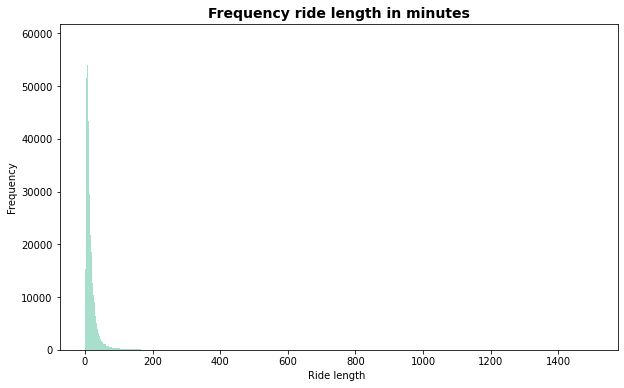

In [43]:
sns.set_context(rc = {'patch.linewidth': 0.0})
hp = sns.histplot(data=df, x="ride_length_minutes", color="#50c19a", alpha=0.5)
hp.figure.set_size_inches(10,6)
hp.set_title("Frequency ride length in minutes", fontsize=14, fontweight="bold");
hp.set(xlabel="Ride length ", ylabel="Frequency")

In [39]:
two_hour_rides = df[["ride_length_minutes", "day_of_week", "member_casual"]].query("ride_length_minutes <= 120")
one_hour_rides = df[["ride_length_minutes", "day_of_week", "member_casual"]].query("ride_length_minutes <= 60")

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Ride length ')]

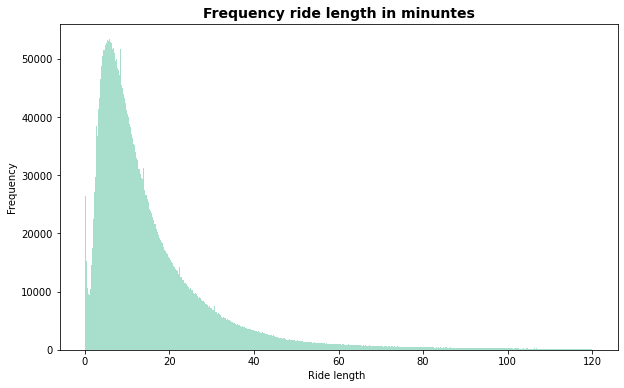

In [44]:
sns.set_context(rc = {'patch.linewidth': 0.0})
hp = sns.histplot(data=two_hour_rides, x="ride_length_minutes", color="#50c19a", alpha=0.5)
hp.figure.set_size_inches(10,6)
hp.set_title("Frequency ride length in minuntes", fontsize=14, fontweight="bold");
hp.set(xlabel="Ride length ", ylabel="Frequency")

### ⏹Total Ride Length x Day of Week

```python
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=df["ride_length_minutes"], y=df["day_of_week"], palette="viridis")
  grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Ride Length", ylabel="Day of week")
  grafico.figure.set_size_inches(w=20, h=7)
```

![](https://drive.google.com/uc?export=view&id=19lFRUmz4oxb9MrFCjAqs3WkNMYYk7HW0)
Fig. 1 - Boxplot of ride length in minutes for each day of week

---

```python
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=two_hour_rides["ride_length_minutes"], y=two_hour_rides["day_of_week"], palette="viridis")
  grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Ride Length", ylabel="Day of week");
  grafico.figure.set_size_inches(w=20, h=7)
```

![](https://drive.google.com/uc?export=view&id=19lPvsxHAtYjHt-IPqrXaDRN6m4xDeH9w)
Fig 2. Boxplot of ride length for rides between 0 and 120 minutes

---

```python
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=one_hour_rides["ride_length_minutes"], y=one_hour_rides["day_of_week"], palette="viridis")
  grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Ride Length", ylabel="Day of week");
  grafico.figure.set_size_inches(w=20, h=7)
```

![](https://drive.google.com/uc?export=view&id=19m38IRJQJGGq0eqmuakiE6eIdu6TCHUT)

Fig 3. Boxplot of ride length for rides between 0 and 60 minutes

---

```python
with sns.axes_style('whitegrid'):

  grafico = sns.violinplot(x=one_hour_rides["day_of_week"], y=one_hour_rides["ride_length_minutes"], hue=one_hour_rides["member_casual"], palette="viridis")
  grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Day of week", ylabel="Ride Length");
  grafico.figure.set_size_inches(w=20, h=12)
```
![](https://drive.google.com/uc?export=view&id=19mq-8A0qJTMjixTzIvKWTeA0RjQmS4uC&)
Fig. 4: Violin plot of ride length in minutes for each day of week with less than one hour

---

In [ ]:
# Color palettes
my_palette = ['#3c9ab2', '#56a6ba', '#71b3c2', '#88b774', '#d1c74c', '#e8c520', '#e4b80d', '#e29e00', '#ea5c00', '#f22300']
customPalette = sns.set_palette(sns.color_palette(my_palette))

#colors_member_casual = {"member": "#FBB040", "casual": "#506F86" }
colors_member_casual = {"Member": '#88b774', "Casual": '#ea5c00' }
colors_day_of_week = {'Monday': '#3c9ab2', 'Tuesday': '#71b3c2', 'Wednesday': '#88b774', 'Thursday': '#ffde45', 'Friday': '#e4b80d', 'Saturday': '#ea5c00', 'Sunday': '#f22300'}
sns.set_palette("viridis")

In [ ]:
#Fig 1:
# with sns.axes_style('whitegrid'):
#   grafico = sns.boxplot(x=df["ride_length_minutes"], y=df["day_of_week"], order=days_order, palette=colors_day_of_week)
#   grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Ride Length", ylabel="Day of week")
#   grafico.figure.set_size_inches(w=20, h=7)

In [ ]:
# Fig. 2:
two_hour_rides = df[["ride_length_minutes", "day_of_week", "member_casual"]].query("ride_length_minutes <= 120")

# with sns.axes_style('whitegrid'):
#   grafico = sns.boxplot(x=two_hour_rides["ride_length_minutes"], y=two_hour_rides["day_of_week"], order=days_order, palette=colors_day_of_week)
#   grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Ride Length", ylabel="Day of week");
#   grafico.figure.set_size_inches(w=20, h=7)

In [ ]:
# Fig. 3:
one_hour_rides = df[["ride_length_minutes", "day_of_week", "member_casual"]].query("ride_length_minutes <= 60")

# with sns.axes_style('whitegrid'):
#   grafico = sns.boxplot(x=one_hour_rides["ride_length_minutes"], y=one_hour_rides["day_of_week"], order=days_order, palette=colors_day_of_week)
#   grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Ride Length", ylabel="Day of week");
#   grafico.figure.set_size_inches(w=20, h=7)

In [45]:
# Fig. 4:
# with sns.axes_style('whitegrid'):
#   grafico = sns.violinplot(x=one_hour_rides["day_of_week"], y=one_hour_rides["ride_length_minutes"], hue=one_hour_rides["member_casual"], palette=colors_member_casual)
#   grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Day of week", ylabel="Ride Length");
#   plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))
#   grafico.figure.set_size_inches(w=20, h=12)

## 📝 Average ride length and other statistical measures for members/casual riders

* The average ride length for members was **12.98**
* The average ride length for casual users was **26.18** 
* **Saturday** was the most frequent day used by casual riders
* **Thursday** was the most frequent day used by members


|member\_casual|count|sum|mean|median|std|max|min|mode|i|
|---|---|---|---|---|---|---|---|---|---|
|casual|2556420|66937502\.73|26\.18407880160537|14\.83|64\.52889747668651|1499\.97|0\.02|8\.42|18\.6|
|member|3341851|43389541\.78|12\.983685322894408|9\.07|27\.36090816276441|1499\.97|0\.02|4\.33|10\.48|




### Calculating IQR for members and casual users

In [46]:
# Calculating IQR for members and casual users
grouped_df = df[['ride_length_minutes', 'member_casual']].groupby('member_casual')
q1, q3 = grouped_df.quantile(0.25), grouped_df.quantile(0.75)
iqr = q3 - q1
iqr

,ride_length_minutes
member_casual,
Casual,18.60
Member,10.48


### Creating a dataframe for statistical measures and merging with IQR

In [47]:
grouped_member_casual = df[['ride_length_minutes', 'member_casual']].groupby('member_casual').agg(['count', 'sum', 'mean', 'median', 'std', 'max', 'min', pd.Series.mode])


In [48]:
user_statistics = pd.merge(left=grouped_member_casual, right=iqr, on='member_casual', how="inner")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  """Entry point for launching an IPython kernel.


In [49]:
user_statistics = user_statistics.rename(lambda x: x[1], axis=1)

In [50]:
user_statistics

,count,sum,mean,median,std,max,min,mode,i
member_casual,,,,,,,,,
Casual,2556420,66937502.73,26.184079,14.83,64.528897,1499.97,0.02,8.42,18.60
Member,3341851,43389541.78,12.983685,9.07,27.360908,1499.97,0.02,4.33,10.48


# 5️⃣ 📊 Supporting visualizations and key findings

In [51]:
month_count = df[['ride_length_minutes', 'member_casual', 'month']].groupby(['month', 'member_casual'], as_index=False).agg('count')


## ⏹ Fig. 5: Total Ride Length x Costumer Type

```python
with sns.axes_style('whitegrid'):
  grafico = sns.boxplot(x=df["ride_length_minutes"], y=df["member_casual"], palette=colors_member_casual)
  grafico.set(title="Ride Length in Minutes for member type", xlabel="Ride Length", ylabel="Costumer Type");
  grafico.figure.set_size_inches(w=20, h=7)
```

![](https://drive.google.com/uc?export=view&id=19nXUAK1S_xIAOXxq5Wp0s03x7Dbj1r0g
)

Fig. 5: Boxplot of ride length in minutes for costumer type

---


In [52]:
# Fig. 5:
# with sns.axes_style('whitegrid'):
#   grafico = sns.boxplot(x=df["ride_length_minutes"], y=df["member_casual"], palette=colors_member_casual)
#   grafico.set(title="Ride Length in Minutes for member type", xlabel="Ride Length", ylabel="Costumer Type");
#   grafico.figure.set_size_inches(w=20, h=7)

## ⏹ Fig. 6: Total Ride Length (< 2h) x Costumer tipe
```python
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=two_hour_rides["ride_length_minutes"], y=two_hour_rides["member_casual"], palette=colors_member_casual)
  grafico.set(title="Ride Length in Minutes for member type", xlabel="Ride Length", ylabel="Costumer Type");
  grafico.figure.set_size_inches(w=20, h=7)
```

![](https://drive.google.com/uc?export=view&id=19nwMsA4RXoRhdAZBmPw3Qo-Pq42OH0-p)

Fig. 6 Boxplot of ride length for rides between 0 and 120 minutes for costumer type

---


In [53]:
# Fig. 6:
# with sns.axes_style('whitegrid'):

#   grafico = sns.boxplot(x=two_hour_rides["ride_length_minutes"], y=two_hour_rides["member_casual"], palette=colors_member_casual)
#   grafico.set(title="Ride Length in Minutes for member type", xlabel="Ride Length", ylabel="Costumer Type");
#   grafico.figure.set_size_inches(w=20, h=7)

## 🟠 Monthly Day of Week x Total Ride Length

```python
grafico = sns.relplot(data=df, y='ride_length_minutes', x='int_day_of_week', hue="member_casual", col="int_month", col_order=months_order,col_wrap=3, alpha=0.7, palette=colors_member_casual)
grafico.set(title="Average ride length in minutes for each day of week by month (2021-2022)", ylabel="Total ride length (minutes)", xlabel="Day of week")
grafico.fig.subplots_adjust(top=.9)
grafico.set_titles(col_template="{col_name}")
```

![](https://drive.google.com/uc?export=view&id=1A2lDlwuZGABIfpHfEFbYr6hFHz-uvNlN)
Fig. 7: Monthly Day of Week x Total ride length from July 2021 - June 2022

---

In [54]:
# Fig. 7

# grafico = sns.relplot(data=df, y='ride_length_minutes', x='int_day_of_week', hue="member_casual", col="int_month", col_order=months_order,col_wrap=3, alpha=0.7, palette=colors_member_casual)
# grafico.set(title="Average ride length in minutes for each day of week by month (2021-2022)", ylabel="Total ride length (minutes)", xlabel="Day of week")
# grafico.fig.subplots_adjust(top=.9)
# grafico.set_titles(col_template="{col_name}")

## 📊 Month | Day of Week x Avg Ride Length 

```python
with sns.axes_style('whitegrid'):
  g = sns.barplot(data=df, 
                  y='ride_length_minutes', 
                  x='int_month', 
                  order=months_order, 
                  hue="day_of_week", 
                  hue_order=days_order, 
                  palette=colors_day_of_week, 
                  capsize=.15, 
                  errwidth=0.2)
  g.set_title("Average ride length in minutes per month (2021 - 2022)", fontsize=14, fontweight="bold");
  g.set(xlabel="Month", ylabel="Average ride length")
  g.figure.set_size_inches(14,7)
  plt.legend(title="Day of week", loc = 2, bbox_to_anchor = (1,1))
```

![](https://drive.google.com/uc?export=view&id=1A3PIslJC4kwHPOulFTLAa7Nfx9cJNVDS)

Fig. 8: Global average ride length for each day of week in minutes per month

---

In [55]:
# # Fig. 8
# with sns.axes_style('whitegrid'):
#   g = sns.barplot(data=df, 
#                   y='ride_length_minutes', 
#                   x='int_month', 
#                   order=months_order, 
#                   hue="day_of_week", 
#                   hue_order=days_order, 
#                   palette=colors_day_of_week, 
#                   capsize=.15, 
#                   errwidth=0.2)
#   g.set_title("Average ride length in minutes per month (2021 - 2022)", fontsize=14, fontweight="bold");
#   g.set(xlabel="Month", ylabel="Average ride length")
#   g.figure.set_size_inches(14,7)
#   plt.legend(title="Day of week", loc = 2, bbox_to_anchor = (1,1))


## 📈 Global Month x Avg Ride Length

```python
with sns.axes_style('whitegrid'):
  graph = sns.pointplot(data=df, 
                        x=df["int_month"], 
                        y=df["ride_length_minutes"], 
                        hue=df["member_casual"], 
                        order=months_order, 
                        palette=colors_member_casual,
                        capsize=.15,
                        errwidth=0.5)
  graph.set_title("Average ride length in minutes per month", fontsize=14, fontweight="bold");
  graph.set(xlabel="Month", ylabel="Average ride length")
  graph.figure.set_size_inches(10,6)
  plt.legend(loc = 2, bbox_to_anchor = (1,1))
```

![](https://drive.google.com/uc?export=view&id=1A3mWipLIq25q-QWp1taKHJqVbSZebVQH)

Fig. 9: Average ride length in minutes per month by costumer type

---

In [56]:
# Fig 9:
# with sns.axes_style('whitegrid'):
#   graph = sns.pointplot(data=df, 
#                         x=df["int_month"], 
#                         y=df["ride_length_minutes"], 
#                         hue=df["member_casual"], 
#                         order=months_order, 
#                         palette=colors_member_casual,
#                         capsize=.15,
#                         errwidth=0.5)
#   graph.set_title("Average ride length in minutes per month", fontsize=14, fontweight="bold");
#   graph.set(xlabel="Month", ylabel="Average ride length")
#   graph.figure.set_size_inches(10,6)
#   plt.legend(loc = 2, bbox_to_anchor = (1,1))

## 📈 Monthly Day of Week x Avg Lenght  

In [57]:
# Creates a list of df for each month 
months = [df.query(f'int_month == {i}') for i in range(1, 13)]

```python
with sns.axes_style('whitegrid'):
  fig, axes = plt.subplots(3, 4, figsize=(24, 12)) # sharex=True, 
  fig.suptitle(t='Mean ride length for each day of week, by month', fontsize=16, fontweight="bold")
  fig.subplots_adjust(hspace=0.3, wspace=0.3)

  m = 6
  year = 2021

  for i in range(3):
    for j in range(4):
      g = sns.lineplot(ax=axes[i, j], x=months[m]['int_day_of_week'], y=months[m]['ride_length_minutes'], hue=months[m]['member_casual'], hue_order=["Member", "Casual"], palette=colors_member_casual)
      g.set(xlabel="Day of week", ylabel="Average ride length", ylim=(0, 33))
      axes[i, j].set_title(f"{month_names[m+1]} - {year}", fontsize=14)
      m += 1
      if m == 12:
        m = 0
        year = 2022
```
![](https://drive.google.com/uc?export=view&id=19sXrVs4S2vbaHn0Pf2gFzT-XcOFChKxc)
Fig. 10: Comparision of ride length for members and casual users by each day of week from July 2021 - June 2022 

---


In [58]:
# Fig. 10
# with sns.axes_style('whitegrid'):
#   fig, axes = plt.subplots(3, 4, figsize=(24, 12)) # sharex=True, 
#   fig.suptitle(t='Mean ride length for each day of week, by month', fontsize=16, fontweight="bold")
#   fig.subplots_adjust(hspace=0.3, wspace=0.3)

#   m = 6
#   year = 2021

#   for i in range(3):
#     for j in range(4):
#       g = sns.lineplot(ax=axes[i, j], x=months[m]['int_day_of_week'], y=months[m]['ride_length_minutes'], hue=months[m]['member_casual'], hue_order=["Member", "Casual"], palette=colors_member_casual)
#       g.set(xlabel="Day of week", ylabel="Average ride length", ylim=(0, 33))
#       axes[i, j].set_title(f"{month_names[m+1]} - {year}", fontsize=14)
#       m += 1
#       if m == 12:
#         m = 0
#         year = 2022

## 📊 Day of Week x Count

In [59]:
day_of_week = df[['day_of_week', 'ride_length', 'member_casual']].groupby(['day_of_week', 'member_casual'], as_index=False).agg('count')
day_of_week.rename(columns={"ride_length": "count"}, inplace=True)

```python
with sns.axes_style('whitegrid'):
  days_count = sns.barplot(data=day_of_week, x='day_of_week', y='count', hue='member_casual', palette=colors_member_casual, order=days_order)
  days_count.set_title("Total rides for each day of week", fontsize=14, fontweight="bold");
  days_count.set(xlabel="Day of week", ylabel="Count")
  days_count.figure.set_size_inches(10,6)
  plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))
```

![](https://drive.google.com/uc?export=view&id=19v3LDjVq9hJs6o4I_LPuGm18kKJzkhlI)

Fig. 11: Total rides by member type for each day of week

---

In [60]:
# Fig. 11:

# with sns.axes_style('whitegrid'):
#   days_count = sns.barplot(data=day_of_week, x='day_of_week', y='count', hue='member_casual', palette=colors_member_casual, order=days_order)
#   days_count.set_title("Total rides for each day of week", fontsize=14, fontweight="bold");
#   days_count.set(xlabel="Day of week", ylabel="Count")
#   days_count.figure.set_size_inches(10,6)
#   plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))

## 📈 Day of Week x Count

```python
with sns.axes_style('whitegrid'):
  days_count = sns.pointplot(data=day_of_week, x='day_of_week', y='count', hue='member_casual', palette=colors_member_casual, linewidth=3)
  days_count.set_title("Total rides for each day of week", fontsize=14, fontweight="bold");
  days_count.set(xlabel="Day of week", ylabel="Count")
  days_count.figure.set_size_inches(10,6)
  plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))
```

![](https://drive.google.com/uc?export=view&id=19vTLAZknTpc9oWlUJWnds6o7QwJAsvc8)

Fig. 12: Line plot of total rides for each day of week.

---

In [61]:
#Fig. 12:
# with sns.axes_style('whitegrid'):
#   days_count = sns.pointplot(data=day_of_week, x='day_of_week', y='count', hue='member_casual', palette=colors_member_casual, linewidth=3)
#   days_count.set_title("Total rides for each day of week", fontsize=14, fontweight="bold");
#   days_count.set(xlabel="Day of week", ylabel="Count")
#   days_count.figure.set_size_inches(10,6)
#   plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))

## 📊 Global Month x Count 

```python
with sns.axes_style('whitegrid'):
  months_count = sns.barplot(data=grouped_months, x='int_month', y='count', hue='member_casual', order=months_order, palette=colors_member_casual)
  months_count.set_title("Total rides for each month from July 2021 - June 2022", fontsize=14, fontweight="bold");
  months_count.set(xlabel="Month", ylabel="Count")
  months_count.figure.set_size_inches(10,6)
  plt.legend(title="Member type", loc = 2, bbox_to_anchor = (1,1))
```
![](https://drive.google.com/uc?export=view&id=19w6p2R193X9BIQDQYV4J63fhBO3gC2lQ)

Fig. 13: Total number of rides by month

---


In [62]:
# Fig. 13
# with sns.axes_style('whitegrid'):
#   months_count = sns.barplot(data=grouped_months, x='int_month', y='count', hue='member_casual', order=months_order, palette=colors_member_casual)
#   months_count.set_title("Total rides for each month from July 2021 - June 2022", fontsize=14, fontweight="bold");
#   months_count.set(xlabel="Month", ylabel="Count")
#   months_count.figure.set_size_inches(10,6)
#   plt.legend(title="Member type", loc = 2, bbox_to_anchor = (1,1))

## 📈 Global Month x Count 

```python
with sns.axes_style('whitegrid'):
  g = sns.pointplot(data=grouped_months, 
                             x='int_month', 
                             y='count', 
                             hue='member_casual', 
                             order=months_order, 
                             palette=colors_member_casual, 
                             linewidth=3)
  g.set_title("Total rides by month", fontsize=14, fontweight="bold");
  g.set(xlabel="Month", ylabel="Count")
  g.figure.set_size_inches(10,6)
  plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))
```

![](https://drive.google.com/uc?export=view&id=19yx-AyyekZmA4pWDK4IJqucbkKR0CKIv)

Fig. 14: Total rides by month

---



In [63]:
# Fig. 14:
# with sns.axes_style('whitegrid'):
#   g = sns.pointplot(data=grouped_months, 
#                              x='int_month', 
#                              y='count', 
#                              hue='member_casual', 
#                              order=months_order, 
#                              palette=colors_member_casual, 
#                              linewidth=3)
#   g.set_title("Total rides by month", fontsize=14, fontweight="bold");
#   g.set(xlabel="Month", ylabel="Count")
#   g.figure.set_size_inches(10,6)
#   plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))

## 📈 Month x Count & Month x Avg Length

In [64]:
grouped_months= df[['int_month', 'ride_length', 'member_casual']].groupby(['int_month', 'member_casual'], as_index=False, sort=False).agg('count')
grouped_months.rename(columns={"ride_length": "count"}, inplace=True)

In [65]:
grouped_months_mean= df[['int_month', 'ride_length_minutes', 'member_casual']].groupby(['int_month', 'member_casual'], sort=False, as_index=False).agg('mean')

```python
with sns.axes_style('whitegrid'):
  fig, axes = plt.subplots(1, 2, figsize=(15, 6))
  fig.suptitle('Ride counts and average ride lenght')
 

  m = 6
  year = 2021

  sns.pointplot(ax=axes[0], data=grouped_months, x='int_month', y='count', hue='member_casual', order=months_order, palette=colors_member_casual, linewidth=2)
  axes[0].set_title("Month x Total rides")
  axes[0].set(xlabel="Month (2021 - 2022)")

  sns.pointplot(ax=axes[1], data=grouped_months_mean, x='int_month', y='ride_length_minutes', hue='member_casual', order=months_order, palette=colors_member_casual, linewidth=2)
  axes[1].set_title("Month x Ride length")
  axes[1].set(xlabel="Month (2021 - 2022)")
  axes[1].set(ylabel="Average ride length (min)")
  plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))
```
![](https://drive.google.com/uc?export=view&id=19zWGsA4doJvpyg6mo06_Tf6GpJPjHAkS)

Fig. 15: Total ride and average ride length by month by costumer type

---


In [66]:
# Fig. 15:
# with sns.axes_style('whitegrid'):
#   fig, axes = plt.subplots(1, 2, figsize=(15, 6))
#   fig.suptitle('Ride counts and average ride lenght')
 

#   m = 6
#   year = 2021

#   sns.pointplot(ax=axes[0], data=grouped_months, x='int_month', y='count', hue='member_casual', order=months_order, palette=colors_member_casual, linewidth=2)
#   axes[0].set_title("Month x Total rides")
#   axes[0].set(xlabel="Month (2021 - 2022)")

#   sns.pointplot(ax=axes[1], data=grouped_months_mean, x='int_month', y='ride_length_minutes', hue='member_casual', order=months_order, palette=colors_member_casual, linewidth=2)
#   axes[1].set_title("Month x Ride length")
#   axes[1].set(xlabel="Month (2021 - 2022)")
#   axes[1].set(ylabel="Average ride length (min)")
#   plt.legend(title="Costumer type", loc = 2, bbox_to_anchor = (1,1))

## 📈 Monthly Day of Week x Count


In [67]:
month_day_of_week = df[['int_month', 'int_day_of_week', 'ride_length', 'member_casual']].groupby(['int_month', 'int_day_of_week', 'member_casual'], as_index=False).agg('count')
month_day_of_week.rename(columns={"ride_length": "count"}, inplace=True)


```python
with sns.axes_style('whitegrid'):
  fig, axes = plt.subplots(3, 4, figsize=(24, 12), sharey=True) # sharex=True, 
  fig.suptitle(t='Ride count for each day of week, by month', fontsize=16, fontweight="bold")
  fig.subplots_adjust(hspace=0.3, wspace=0.3)
  # fig.legend(labels=labels, loc='lower right', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)

  m = 6
  year = 2021

  for i in range(3):
    for j in range(4):
      month_df = month_day_of_week.query(f'int_month == {m}')
      gf = sns.pointplot(ax=axes[i, j], data=month_df, x='int_day_of_week', y='count', hue='member_casual', hue_order=["Member", "Casual"], palette=colors_member_casual)
      gf.set(xlabel="Day of week", ylabel="Count")
      axes[i, j].set_title(f"{month_names[m]} - {year}", fontsize=14)
      m += 1
      if m == 13:
        m = 1
        year = 2022
```

![](https://drive.google.com/uc?export=view&id=19zaSYlI5tuV8pAKhvLMWz8nVFLowE88r)
Fig. 16: Daily number of rides by months


In [68]:
# Fig. 16:
# with sns.axes_style('whitegrid'):
#   fig, axes = plt.subplots(3, 4, figsize=(24, 12), sharey=True) # sharex=True, 
#   fig.suptitle(t='Ride count for each day of week, by month', fontsize=16, fontweight="bold")
#   fig.subplots_adjust(hspace=0.3, wspace=0.3)
#   # fig.legend(labels=labels, loc='lower right', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)

#   m = 6
#   year = 2021

#   for i in range(3):
#     for j in range(4):
#       month_df = month_day_of_week.query(f'int_month == {m}')
#       gf = sns.pointplot(ax=axes[i, j], data=month_df, x='int_day_of_week', y='count', hue='member_casual', hue_order=["Member", "Casual"], palette=colors_member_casual)
#       gf.set(xlabel="Day of week", ylabel="Count")
#       axes[i, j].set_title(f"{month_names[m]} - {year}", fontsize=14)
#       m += 1
#       if m == 13:
#         m = 1
#         year = 2022

## 📊 Global Hour X Count

In [69]:
hour_count = df[['hour', 'ride_length', 'member_casual']].groupby(['hour', 'member_casual'], as_index=False).agg('count')
hour_count.rename(columns={"ride_length": "count"}, inplace=True)

```python
with sns.axes_style('whitegrid'):
  h = sns.barplot(data=hour_count, x='hour', y='count', hue='member_casual', palette=colors_member_casual)
  h.set_title("Total rides for each hour", fontsize=14, fontweight="bold");
  h.set(xlabel="Hour", ylabel="Count")
  h.figure.set_size_inches(12,6)
  plt.legend(title="Member type", loc = 2, bbox_to_anchor = (1,1))
```

![](https://drive.google.com/uc?export=view&id=1A-XecmHdv7bDyGu2dBuqUe5nuHyHfVDB)

Fig. 17: Bar chart for hourly global number of rides

---

In [70]:
# Fig. 17:
# with sns.axes_style('whitegrid'):
#   h = sns.barplot(data=hour_count, x='hour', y='count', hue='member_casual', palette=colors_member_casual)
#   h.set_title("Total rides for each hour", fontsize=14, fontweight="bold");
#   h.set(xlabel="Hour", ylabel="Count")
#   h.figure.set_size_inches(12,6)
#   plt.legend(title="Member type", loc = 2, bbox_to_anchor = (1,1))

## 📈 Global Hour X Count

```python
with sns.axes_style('whitegrid'):
  h = sns.pointplot(data=hour_count, x='hour', y='count', hue='member_casual', palette=colors_member_casual)
  h.set_title("Total rides for each hour", fontsize=14, fontweight="bold");
  h.set(xlabel="Hour", ylabel="Count")
  h.figure.set_size_inches(12,6)
  plt.legend(title="Member type", loc = 2, bbox_to_anchor = (1,1))
```
![](https://drive.google.com/uc?export=view&id=1A-YMeiG46oPs9h5fItcvgxlyZ6cN7v1Q)

Fig. 18: Line chart for hourly global number of rides

In [71]:
# Fig. 18:
# with sns.axes_style('whitegrid'):
#   h = sns.pointplot(data=hour_count, x='hour', y='count', hue='member_casual', palette=colors_member_casual)
#   h.set_title("Total rides for each hour", fontsize=14, fontweight="bold");
#   h.set(xlabel="Hour", ylabel="Count")
#   h.figure.set_size_inches(12,6)
#   plt.legend(title="Member type", loc = 2, bbox_to_anchor = (1,1))

## 📉 Monthly Hour x Count 

In [72]:
hour_month_count = df[['hour', 'ride_length', 'int_month', 'member_casual']].groupby(['int_month', 'hour', 'member_casual'], as_index=False).agg('count')
hour_month_count.rename(columns={"ride_length": "count"}, inplace=True)

```python
with sns.axes_style('whitegrid'):
  fig, axes = plt.subplots(3, 4, figsize=(24, 12), sharey=True) # sharex=True, 
  fig.suptitle(t='Ride count for hour, by month', fontsize=16, fontweight="bold")
  fig.subplots_adjust(hspace=0.3, wspace=0.15)
  # fig.legend(labels=labels, loc='lower right', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)

  m = 7
  year = 2021

  for i in range(3):
    for j in range(4):
      month_df = hour_month_count.query(f'int_month == {m}')
      gf = sns.lineplot(ax=axes[i, j], data=month_df, x='hour', y='count', hue='member_casual', hue_order=["Member", "Casual"], palette=colors_member_casual)
      gf.set(xlabel="Hour", ylabel="Count")
      axes[i, j].set_title(f"{month_names[m]} - {year}", fontsize=14)
      m += 1
      if m == 13:
        m = 1
        year = 2022
```
![](https://drive.google.com/uc?export=view&id=1A0ya15SJqwMwMT9mYSeTWQknqq141rG9)

Fig. 19: Monthly number of rides by hour from July 2021 - June 2022

In [73]:
# Fig. 19:
# with sns.axes_style('whitegrid'):
#   fig, axes = plt.subplots(3, 4, figsize=(24, 12), sharey=True) # sharex=True, 
#   fig.suptitle(t='Ride count for hour, by month', fontsize=16, fontweight="bold")
#   fig.subplots_adjust(hspace=0.3, wspace=0.15)
#   # fig.legend(labels=labels, loc='lower right', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)

#   m = 7
#   year = 2021

#   for i in range(3):
#     for j in range(4):
#       month_df = hour_month_count.query(f'int_month == {m}')
#       gf = sns.lineplot(ax=axes[i, j], data=month_df, x='hour', y='count', hue='member_casual', hue_order=["Member", "Casual"], palette=colors_member_casual)
#       gf.set(xlabel="Hour", ylabel="Count")
#       axes[i, j].set_title(f"{month_names[m]} - {year}", fontsize=14)
#       m += 1
#       if m == 13:
#         m = 1
#         year = 2022

## Pivot tables and Heatmaps

### 💠 Month x Day of week

In [74]:
day_month_count = df[['int_month', 'ride_length', 'day_of_week']].groupby(['int_month', 'day_of_week'], as_index=False, sort=False).agg('count')
day_month_count.rename(columns={"ride_length": "count"}, inplace=True)

In [75]:
pivot_day_month = day_month_count.pivot("day_of_week", "int_month", "count")
pivot_day_month = pivot_day_month.reindex(months_order, axis=1)

```python
heatmd = sns.heatmap(data=pivot_day_month, cmap="Spectral_r")
heatmd.set_title("Rides per day of week for each month ", fontsize=14, fontweight="bold")
heatmd.set(xlabel="Month", ylabel="Day of Week")
heatmd.figure.set_size_inches(10,4)
```

![](https://drive.google.com/uc?export=view&id=1A18rZVqwKZTcbAGW500aPxSJG6PDSYD1)

Fig. 20: Heat map of number of rides Month X Week day

---

In [76]:
# Fig. 20:
# heatmd = sns.heatmap(data=pivot_day_month, cmap="Spectral_r")
# heatmd.set_title("Rides per day of week for each month ", fontsize=14, fontweight="bold")
# heatmd.set(xlabel="Month", ylabel="Day of Week")
# heatmd.figure.set_size_inches(10,4)

### 💠 Day of week x Hour

#### Global 

In [77]:
# Creating dataframe
hour_day_count = df[['hour', 'ride_length', 'day_of_week']].groupby(['day_of_week', 'hour'], as_index=False).agg('count')
hour_day_count.rename(columns={"ride_length": "count"}, inplace=True)

In [78]:
pivot_hour_day = hour_day_count.pivot("day_of_week", "hour", "count")
pivot_hour_day = pivot_hour_day.reindex(days_order, axis=0)

```python
heatdh = sns.heatmap(data=pivot_hour_day, cmap="Spectral_r")
heatdh.set_title("Rides per hour for each day of week ", fontsize=14, fontweight="bold")
heatdh.set(xlabel="Hour", ylabel="Day of week")
heatdh.figure.set_size_inches(12,5)
```
![](https://drive.google.com/uc?export=view&id=1A2TKqAPDcDtLTDg0i8Id4kuB6jey9tdf)

Fig. 21: Heatmap of global number of rides Hour x Day of week

---


In [79]:
# Fig. 21:
# heatdh = sns.heatmap(data=pivot_hour_day, cmap="Spectral_r")
# heatdh.set_title("Rides per hour for each day of week ", fontsize=14, fontweight="bold")
# heatdh.set(xlabel="Hour", ylabel="Day of week")
# heatdh.figure.set_size_inches(12,5)

#### Members

In [80]:
hour_day_count_member = df.query("member_casual == 'Member'")[['hour', 'ride_length', 'day_of_week']].groupby(['day_of_week', 'hour'], as_index=False).agg('count')
hour_day_count_member.rename(columns={"ride_length": "count"}, inplace=True)

In [81]:
pivot_hd_member = hour_day_count_member.pivot("day_of_week", "hour", "count")
pivot_hd_member = pivot_hd_member.reindex(days_order, axis=0)


```python
heatdhm = sns.heatmap(data=pivot_hd_member, cmap="Spectral_r")
heatdhm.set_title("Rides per hour for each day of week by members", fontsize=14, fontweight="bold")
heatdhm.set(xlabel="Hour", ylabel="Day of week")
heatdhm.figure.set_size_inches(10,4)
```

![](https://drive.google.com/uc?export=view&id=1A2bKF1ZjFa4qNxVixP8BRH8o95R-lozz)

Fig. 22: Heat map of members number of rides - Hour x Day of week



In [82]:
# Fig. 22:
# heatdhm = sns.heatmap(data=pivot_hd_member, cmap="Spectral_r")
# heatdhm.set_title("Rides per hour for each day of week by members", fontsize=14, fontweight="bold")
# heatdhm.set(xlabel="Hour", ylabel="Day of week")
# heatdhm.figure.set_size_inches(10,4)

#### Casual

In [83]:
hour_day_count_casual = df.query("member_casual == 'Casual'")[['hour', 'member_casual', 'day_of_week']].groupby(['day_of_week', 'hour'], as_index=False).agg('count')
hour_day_count_casual.rename(columns={"member_casual": "count"}, inplace=True)


In [84]:
pivot_hd_casual = hour_day_count_casual.pivot("day_of_week", "hour", "count")
pivot_hd_casual = pivot_hd_casual.reindex(days_order, axis=0)

```python
heatdhc = sns.heatmap(data=pivot_hd_casual, cmap="Spectral_r")
heatdhc.set_title("Rides per hour for each day of week by casual users", fontsize=14, fontweight="bold")
heatdhc.set(xlabel="Hour", ylabel="Day of week")
heatdhc.figure.set_size_inches(10,4)
```

![](https://drive.google.com/uc?export=view&id=1A2cXGUsCmlpkcScXz3Wpat__IFTqeAEL)

Fig. 23: Heat map of casual users number of rides - Hour x Day of week

In [85]:
# Fig. 23:
# heatdhc = sns.heatmap(data=pivot_hd_casual, cmap="Spectral_r")
# heatdhc.set_title("Rides per hour for each day of week by casual users", fontsize=14, fontweight="bold")
# heatdhc.set(xlabel="Hour", ylabel="Day of week")
# heatdhc.figure.set_size_inches(10,4)

[Text(784.7272727272725, 0.5, 'Day of week'), Text(0.5, 24.0, 'Hour')]

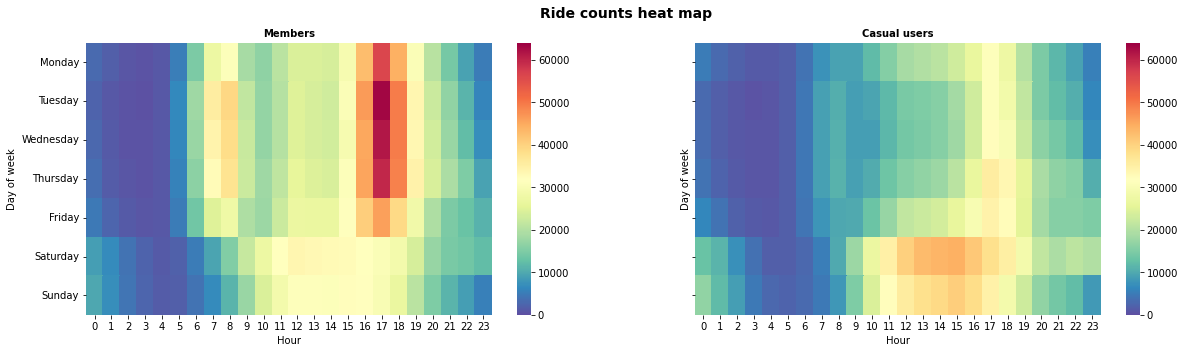

In [100]:
# Fig. 24:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Ride counts heat map',fontsize=14, fontweight="bold")

sns.heatmap(ax=axes[0], data=pivot_hd_member, cmap="Spectral_r", vmin=0, vmax=64000)
axes[0].set_title("Members", fontsize=10, fontweight="bold")
axes[0].set(xlabel="Hour", ylabel="Day of week")

sns.heatmap(ax=axes[1], data=pivot_hd_casual, cmap="Spectral_r", vmin=0, vmax=64000)
axes[1].set_title("Casual users", fontsize=10, fontweight="bold")
axes[1].set(xlabel="Hour", ylabel="Day of week")
